# 🦠 **MiniDatathonF5: Análisis de Datos de Covid-19 en EE.UU.**

## 📊 **Reto**

Este proyecto tiene como objetivo explorar y analizar datos históricos sobre la incidencia del Covid-19 en Estados Unidos, utilizando la API pública y gratuita proporcionada por [The Covid Tracking Project](https://covidtracking.com/data/api). La API ofrece un registro detallado de los datos hasta el año 2021, desglosados por estado.

## 🛠️ **Objetivo**

- Cargar los datos históricos de Covid-19 por estado utilizando Python.
- Realizar una exploración exhaustiva de esos datos.
- Elaborar un informe que destaque las conclusiones y los descubrimientos realizados.
- Contar la historia que los datos revelan sobre la pandemia en EE.UU.

## ⏳ **Plazos**

- El proyecto se llevará a cabo durante los días **19 y 20 de agosto de 2024**.

## 📦 **Entregables**

- Un **repositorio en GitHub** con el trabajo organizado en ramas, incluyendo mensajes de commit claros y descriptivos.
- Un **cuaderno de Jupyter** que contenga el análisis realizado.
- Una **presentación de conclusiones**, que puede ser un documento detallando los hallazgos.

## 🛠️ **Tecnologías a utilizar**

- **Requests** para la interacción con la API.
- **Pandas** para la manipulación y análisis de los datos.
- **Matplotlib**, **Pyplot**, **Seaborn** y **Bokeh** para la visualización de datos.




#Conectar con la API

In [38]:
#Importamos librerías
import requests #Para llamar a la api
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

url='https://api.covidtracking.com/v1/states/daily.json'

df_covid = requests.get(url)

print(df_covid.json())


Output hidden; open in https://colab.research.google.com to view.

In [39]:
#Leer el JSON desde la url
df_covid = pd.read_json(url)

# Convertir a tipo datetime
df = pd.DataFrame(df_covid)

# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

#Mostrar las primeras filas del DataFrame
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [40]:
df['inIcuCurrently']

,inIcuCurrently
0,NaN
1,NaN
2,141.0
3,NaN
4,273.0
...,...
20775,NaN
20776,NaN
20777,NaN
20778,NaN


In [ ]:
# Saber número de filas y columnas que contiene el df
filas, columnas = df_covid.shape

print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 20780 filas y 56 columnas.


In [42]:
# Todas las columnas en lista
list(df)

['date',
 'state',
 'positive',
 'probableCases',
 'negative',
 'pending',
 'totalTestResultsSource',
 'totalTestResults',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'lastUpdateEt',
 'dateModified',
 'checkTimeEt',
 'death',
 'hospitalized',
 'hospitalizedDischarged',
 'dateChecked',
 'totalTestsViral',
 'positiveTestsViral',
 'negativeTestsViral',
 'positiveCasesViral',
 'deathConfirmed',
 'deathProbable',
 'totalTestEncountersViral',
 'totalTestsPeopleViral',
 'totalTestsAntibody',
 'positiveTestsAntibody',
 'negativeTestsAntibody',
 'totalTestsPeopleAntibody',
 'positiveTestsPeopleAntibody',
 'negativeTestsPeopleAntibody',
 'totalTestsPeopleAntigen',
 'positiveTestsPeopleAntigen',
 'totalTestsAntigen',
 'positiveTestsAntigen',
 'fips',
 'positiveIncrease',
 'negativeIncrease',
 'total',
 'totalTestResultsIncrease',
 'posNeg',
 'dataQualityGrade',
 'deathIncrease',
 'h

#Identificar valores faltantes

In [43]:
# Contar los valores faltantes en cada columna
missing_data = df_covid.isnull().sum()
print(missing_data)


date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

<Axes: >

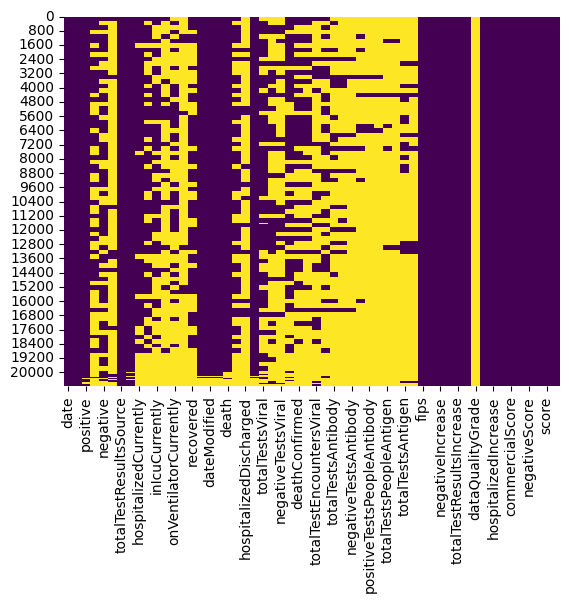

In [44]:
#librería para ver los datos faltantes en las columnas de forma visual
import seaborn as sns
sns.heatmap(df_covid.isnull(), cbar=False, cmap='viridis')


#Identificar valores duplicados

In [45]:
# Contar el número de filas duplicadas
duplicated_rows = df_covid.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")


Número de filas duplicadas: 0


#Limpieza datos

In [46]:
#Para limpiar los datos que faltan
#df_covid.dropna(axis=1, inplace=True)


In [48]:
#Seleccionar las columnas que me resultan interesantes para llevar a cabo el estudio
df_columnas_analizadas = df[['date', 'state', 'positive', 'negative', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently', 'recovered', 'death','totalTestResults', 'positiveIncrease', 'deathIncrease', 'hospitalizedIncrease']]
#df_columnas_analizadas = df[['date', 'state', 'positive', 'negative', 'hospitalizedCurrently', 'death','totalTestResults']]
#df=df[columnas_analizadas]

print(df_columnas_analizadas)

            date state  positive   negative  hospitalizedCurrently  \
0     2021-03-07    AK   56886.0        NaN                   33.0   
1     2021-03-07    AL  499819.0  1931711.0                  494.0   
2     2021-03-07    AR  324818.0  2480716.0                  335.0   
3     2021-03-07    AS       0.0     2140.0                    NaN   
4     2021-03-07    AZ  826454.0  3073010.0                  963.0   
...          ...   ...       ...        ...                    ...   
20775 2020-01-17    WA       0.0        NaN                    NaN   
20776 2020-01-16    WA       0.0        NaN                    NaN   
20777 2020-01-15    WA       0.0        NaN                    NaN   
20778 2020-01-14    WA       0.0        NaN                    NaN   
20779 2020-01-13    WA       NaN        NaN                    NaN   

       inIcuCurrently  onVentilatorCurrently  recovered    death  \
0                 NaN                    2.0        NaN    305.0   
1                 NaN  

In [50]:
# Descripción general de los datos
df_columnas_analizadas.describe()

,date,positive,negative,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,death,totalTestResults,positiveIncrease,deathIncrease,hospitalizedIncrease
count,20780,2.059200e+04,1.329000e+04,17339.000000,11636.000000,9126.000000,1.200300e+04,19930.000000,2.061400e+04,20780.000000,20780.000000,20780.000000
mean,2020-09-02 18:13:30.779595776,1.651560e+05,8.482246e+05,1190.576965,359.621176,151.589305,9.424223e+04,3682.216859,2.186936e+06,1383.849519,24.790712,37.360780
min,2020-01-13 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000e+00,-7757.000000,-201.000000,-12257.000000
25%,2020-06-02 00:00:00,5.753750e+03,5.394125e+04,166.500000,60.000000,29.000000,3.379000e+03,161.250000,1.040498e+05,65.000000,0.000000,0.000000
50%,2020-09-03 00:00:00,4.606450e+04,3.059720e+05,531.000000,172.000000,86.000000,1.761800e+04,1108.000000,6.552670e+05,435.000000,6.000000,0.000000
75%,2020-12-05 00:00:00,1.779580e+05,1.056611e+06,1279.000000,380.000000,185.000000,9.315250e+04,4387.500000,2.264766e+06,1335.250000,24.000000,36.000000
max,2021-03-07 00:00:00,3.501394e+06,1.018694e+07,22851.000000,5225.000000,2425.000000,2.502609e+06,54124.000000,4.964601e+07,71734.000000,2559.000000,16373.000000
std,NaN,3.267852e+05,1.344501e+06,2060.041207,594.831150,207.755157,2.110372e+05,6281.366321,4.436508e+06,3023.558742,60.162742,208.237151


#Evolución de Positivos y Muertes

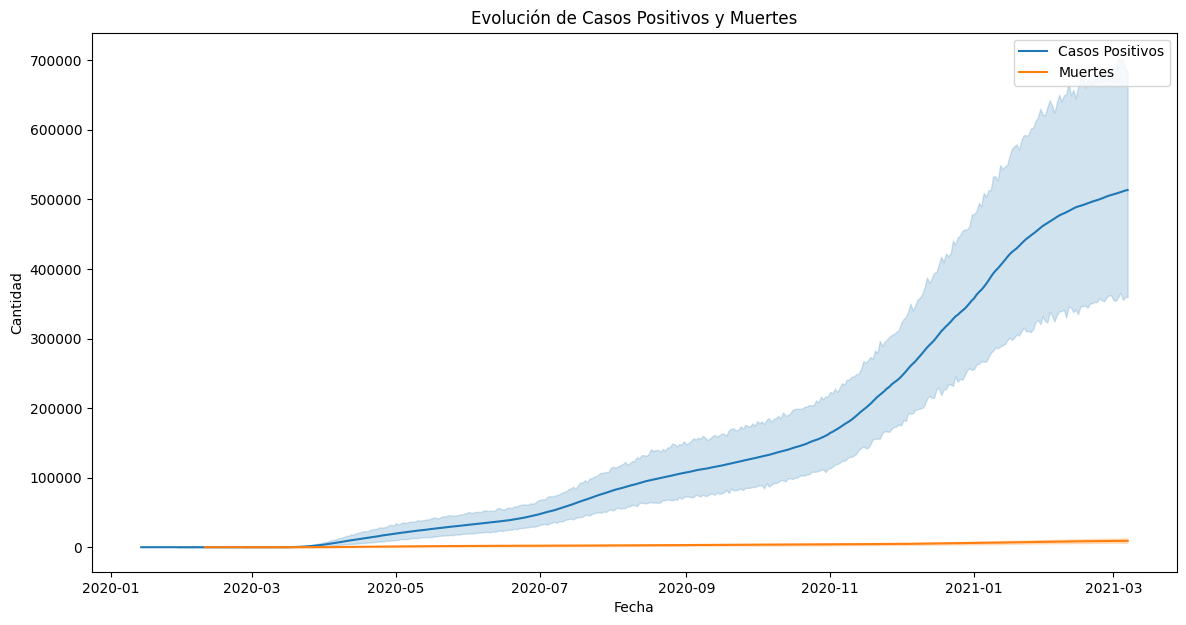

In [51]:
#Casos Positivos y Muertes a lo largo del tiempo

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='positive', label='Casos Positivos')
sns.lineplot(data=df, x='date', y='death', label='Muertes')
plt.title('Evolución de Casos Positivos y Muertes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


#Comparación entre Estados


<ipython-input-52-60178c5347a4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='state', y='positive', ci=None)


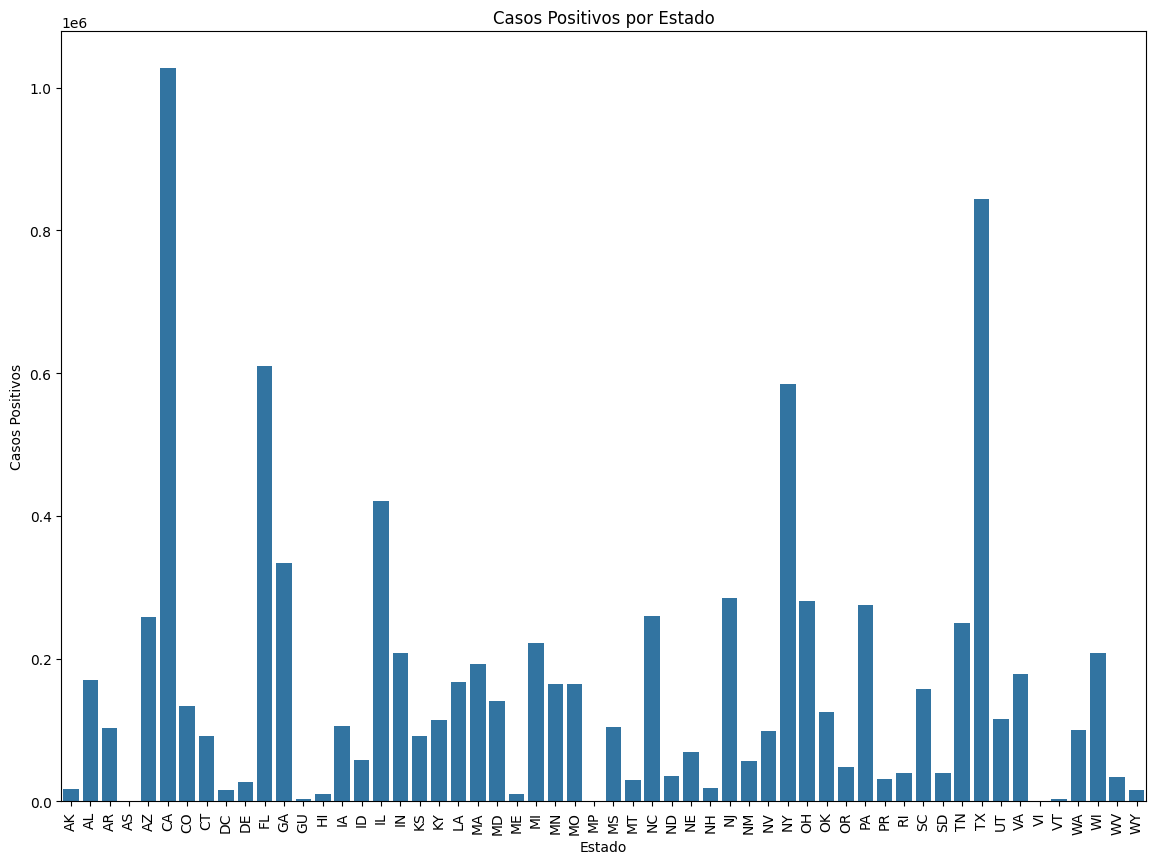

In [52]:
#Comparación de Casos Positivos y Muertes por Estado
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='state', y='positive', ci=None)
plt.title('Casos Positivos por Estado')
plt.xlabel('Estado')
plt.ylabel('Casos Positivos')
plt.xticks(rotation=90)
plt.show()


In [59]:
#Evolución de Casos Positivos de COVID-19 en Estados Unidos
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.palettes import Spectral11

# Obtenemos la lista de todos los estados únicos en los datos
states = df['state'].unique()

# Configuración para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear la figura, ajustando 'height' y 'width'
p = figure(x_axis_type="datetime", title="Evolución de Casos Positivos de COVID-19 en Estados Unidos",
           height=400, width=900)

# Configurar etiquetas de los ejes
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Casos Positivos'
p.grid.grid_line_alpha = 0.3

# Usar la paleta de colores para las líneas
colors = Spectral11

# Graficar la evolución de casos positivos para cada estado
for i, state in enumerate(states):
    state_data = df[df['state'] == state]
    p.line(state_data['date'], state_data['positive'], color=colors[i % len(colors)],
           legend_label=state, line_width=2)

# Configurar la leyenda
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Añadir la herramienta de hover para mostrar detalles al pasar el puntero
hover = HoverTool()
hover.tooltips = [("Estado", "@legend_label"), ("Fecha", "@x{%F}"), ("Positivos", "@y")]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

# Mostrar el gráfico
show(p)



In [65]:
from math import pi
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from bokeh.models import ColumnDataSource

# Agrupar datos por estado y sumar los casos positivos
df_grouped = df.groupby('state')['positive'].sum().reset_index()

# Calcular el ángulo de cada porción de la tarta
df_grouped['angle'] = df_grouped['positive']/df_grouped['positive'].sum() * 2*pi

# Asignar colores reutilizando la paleta si es necesario
df_grouped['color'] = [Category20c[20][i % 20] for i in range(len(df_grouped))]

# Configuración para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear la gráfica de tarta
p = figure(height=350, title="Distribución de Casos Positivos de COVID-19 por Estado", toolbar_location=None, tools="hover", tooltips="@state: @positive", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='state', source=ColumnDataSource(df_grouped))

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

# Mostrar la gráfica
show(p)


<ipython-input-53-6b2c7401c991>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='state', y='hospitalizedCurrently', ci=None)


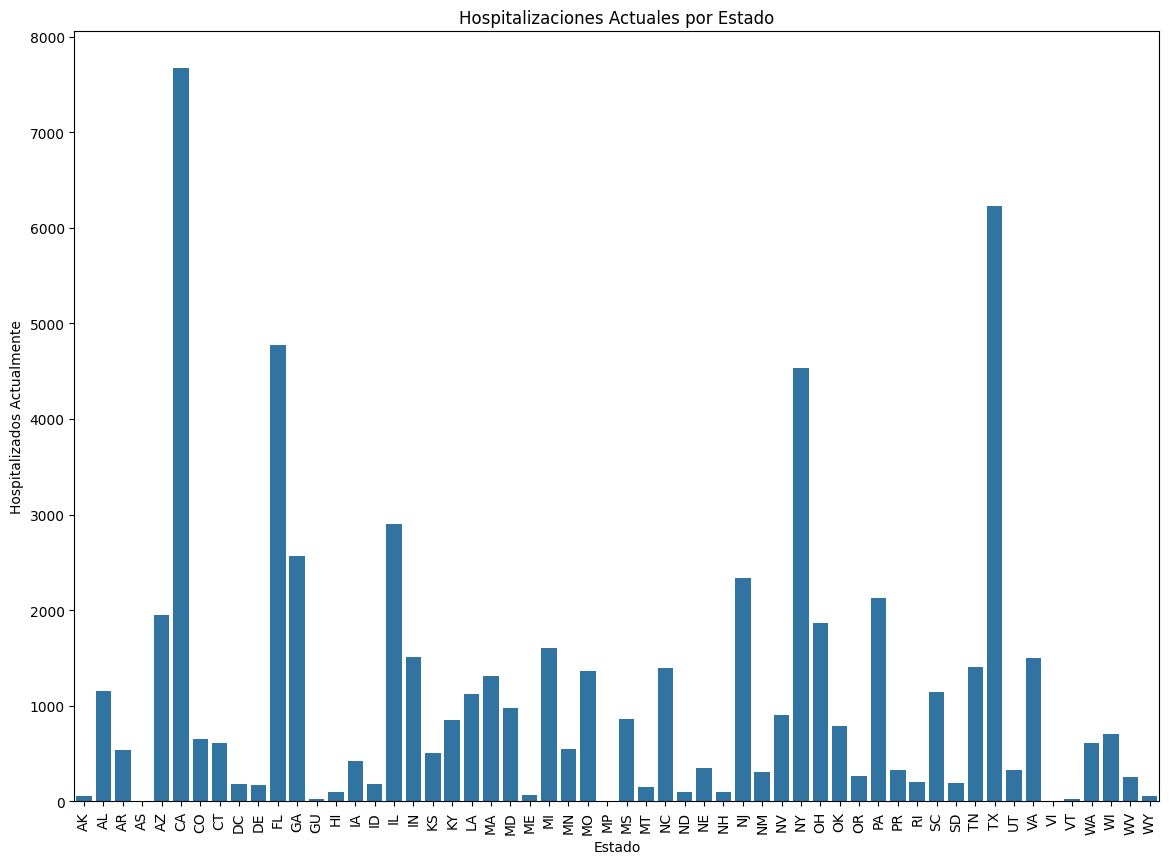

In [53]:
#Comparación Hospitalizaciones
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='state', y='hospitalizedCurrently', ci=None)
plt.title('Hospitalizaciones Actuales por Estado')
plt.xlabel('Estado')
plt.ylabel('Hospitalizados Actualmente')
plt.xticks(rotation=90)
plt.show()



#Incremento Diario

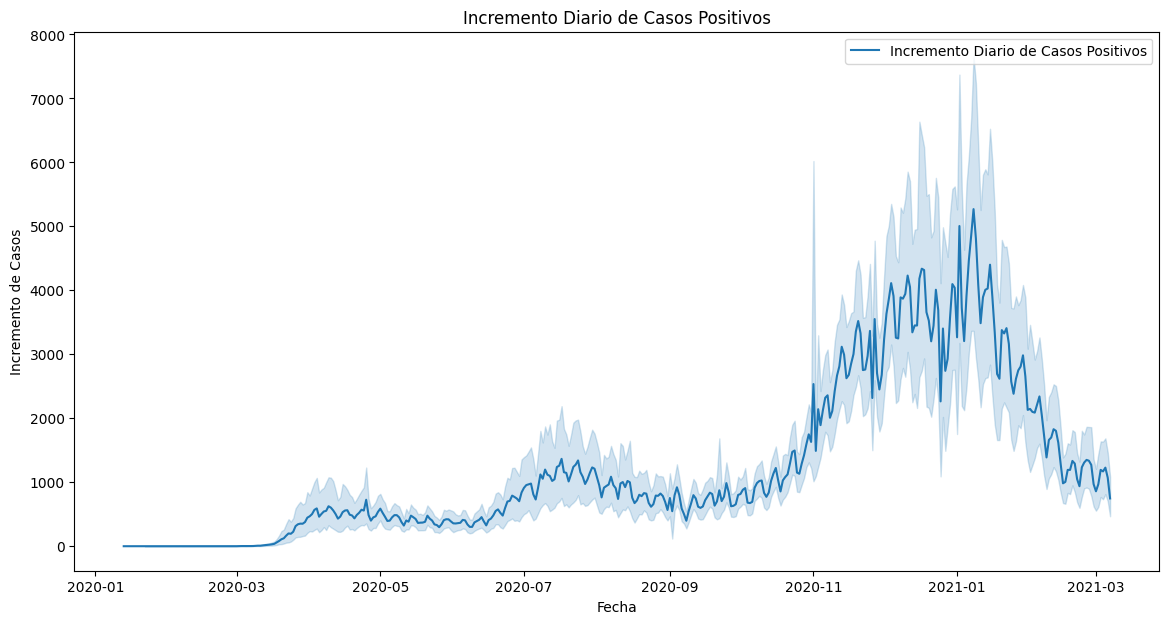

In [54]:
#Incremento Diario de Casos Positivos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='positiveIncrease', label='Incremento Diario de Casos Positivos')
plt.title('Incremento Diario de Casos Positivos')
plt.xlabel('Fecha')
plt.ylabel('Incremento de Casos')
plt.show()


#Relación entre variables

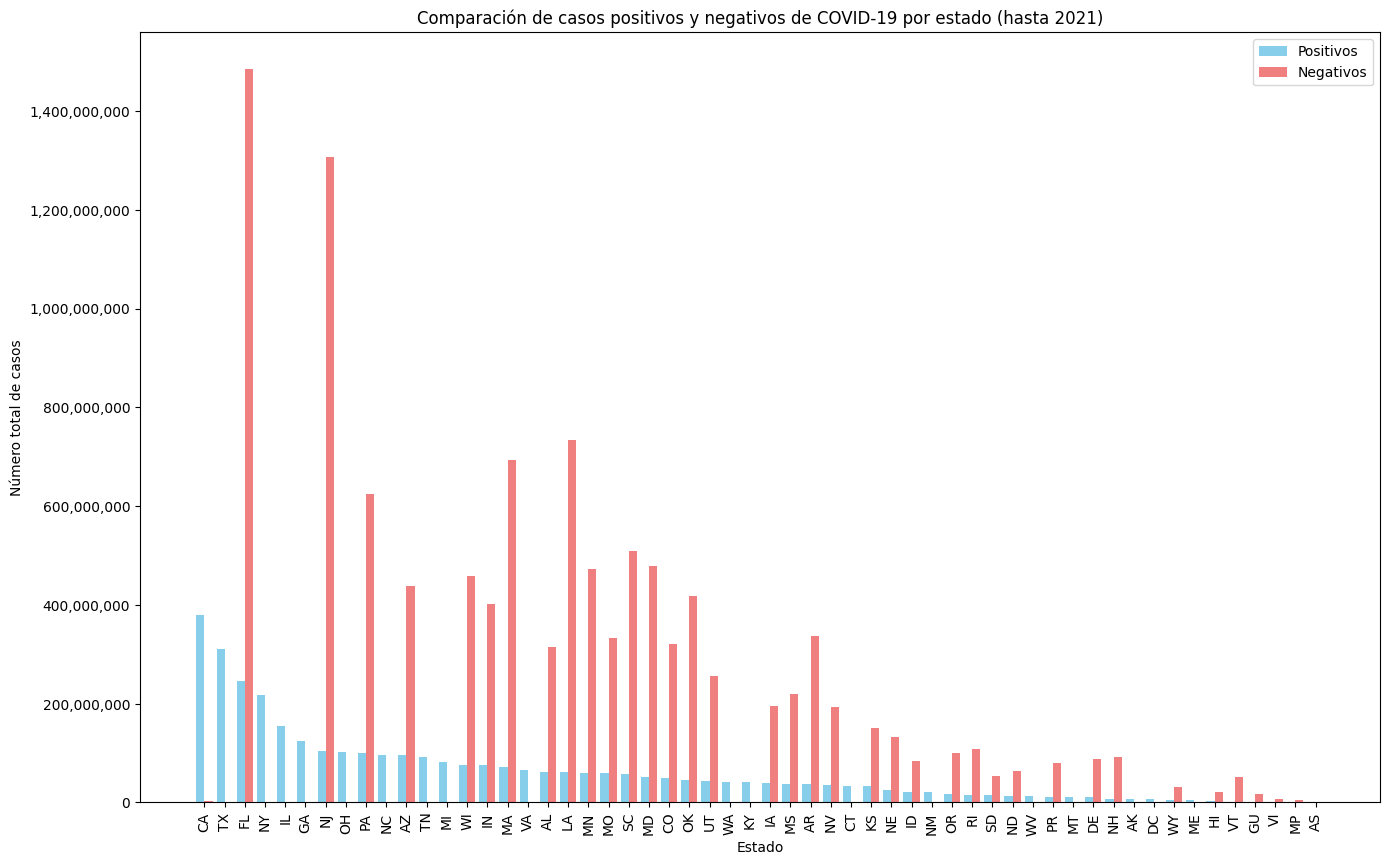

In [66]:
# Agrupar por estado y sumar los casos positivos y negativos
state_summary = df.groupby('state')[['positive', 'negative']].sum().sort_values(by='positive', ascending=False)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(16, 10))

# Crear un rango para la posición de los estados
indices = np.arange(len(state_summary))

# Ancho de las barras
bar_width = 0.4

# Crear las barras para los casos positivos y negativos
plt.bar(indices, state_summary['positive'], bar_width, label='Positivos', color='skyblue')
plt.bar(indices + bar_width, state_summary['negative'], bar_width, label='Negativos', color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Comparación de casos positivos y negativos de COVID-19 por estado (hasta 2021)')
plt.xlabel('Estado')
plt.ylabel('Número total de casos')
plt.xticks(indices + bar_width / 2, state_summary.index, rotation=90)  # Posicionar etiquetas del eje x

# Modificar el formato del eje y para que muestre números enteros en miles o millones
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend()

# Mostrar el gráfico
plt.show()

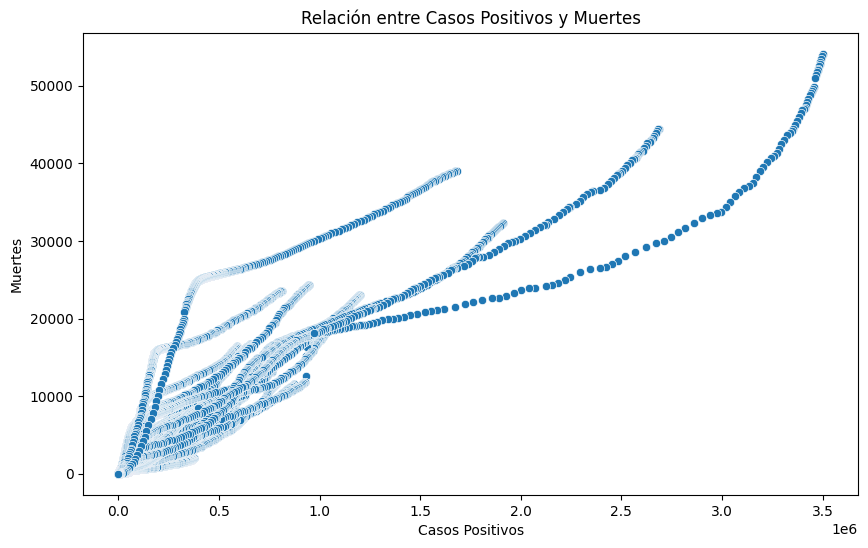

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='positive', y='death')
plt.title('Relación entre Casos Positivos y Muertes')
plt.xlabel('Casos Positivos')
plt.ylabel('Muertes')
plt.show()
